<a href="https://colab.research.google.com/github/vinodgaitonde/ProjIdeas/blob/main/WordPredict_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required packages

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
import numpy as np
import random
import sys

Load Text

In [6]:
filename = "./sample_data/1661-split.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print('corpus length:', len(raw_text))
print(raw_text[0:100])

corpus length: 282300
﻿
project gutenberg's the adventures of sherlock holmes, by arthur conan doyle

this ebook is for th


# Data Preparation - Clean text

In [7]:
raw_text = ''.join(c for c in raw_text if not c.isdigit())

In [8]:
#How many total characters do we have in our training text?
chars = sorted(list(set(raw_text))) #List of every character
print('total chars:', len(chars))

total chars: 56


In [9]:
#Character sequences must be encoded as integers.
#Each unique character will be assigned an integer value.
#Create a dictionary of characters mapped to integer values
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [10]:
#Do the reverse so we can print our predictions in characters and not integers
int_to_char = dict((i, c) for i, c in enumerate(chars))

Summarize the data

In [11]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters in the text; corpus length:  282109
Total Vocab:  56


Create Input/Output sequence for training

In [12]:
seq_length = 60  #Length of each input sequence
step = 10   #Instead of moving 1 letter at a time, try skipping a few.
sentences = []    # X values (Sentences)
next_chars = []   # Y values. The character that follows the sentence defined as X
for i in range(0, n_chars - seq_length, step):  #step=1 means each sentence is offset just by a single letter
    sentences.append(raw_text[i: i + seq_length])  #Sequence in
    next_chars.append(raw_text[i + seq_length])  #Sequence out
n_patterns = len(sentences)
print('Number of sequences:', n_patterns)

Number of sequences: 28205


In [13]:
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=bool)
y = np.zeros((len(sentences), n_vocab), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

print(x.shape)
print(y.shape)

print(y[0:10])

(28205, 60, 56)
(28205, 56)
[[False False False False False False False False False False False False
  False False False False False False  True False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False  True False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False  True False False False False False False False 

#Basic model with one LSTM

In [14]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          94,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 56)                  │           7,224 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,944 (398.22 KB)

 Trainable params: 101,944 (398.22 KB)

 Non-trainable params: 0 (0.00 B)

# define the checkpoint

In [15]:
from keras.callbacks import ModelCheckpoint

filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

# Fit the model

In [16]:
history = model.fit(x, y,
          batch_size=128,
          epochs=50,
          callbacks=callbacks_list)

model.save('my_saved_weights_book_50epochs.keras')

Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 2.9141
Epoch 1: loss improved from inf to 2.62012, saving model to saved_weights/saved_weights-01-2.6201.keras
221/221 ━━━━━━━━━━━━━━━━━━━━ 43s 186ms/step - loss: 2.9128
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 2.2026
Epoch 2: loss improved from 2.62012 to 2.15664, saving model to saved_weights/saved_weights-02-2.1566.keras
221/221 ━━━━━━━━━━━━━━━━━━━━ 41s 185ms/step - loss: 2.2024
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 1.9865
Epoch 3: loss improved from 2.15664 to 1.97698, saving model to saved_weights/saved_weights-03-1.9770.keras
221/221 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - loss: 1.9864
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 1.8545
Epoch 4: loss improved from 1.97698 to 1.85847, saving model to saved_weights/saved_weights-04-1.8585.keras
221/221 ━━━━━━━━━━━━━━━━━━━━ 43s 194ms/step - loss: 1.8545
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss

Plot

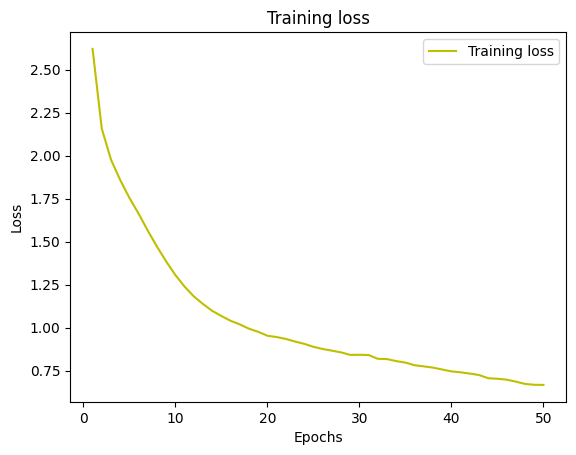

In [17]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Generate Characters

In [18]:
def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Prediction

In [19]:
filename = "my_saved_weights_book_50epochs.keras"
model.load_weights(filename)

Pick a random sentence from the text as seed.

In [20]:
start_index = random.randint(0, n_chars - seq_length - 1)

Initiate generated text and keep adding new predictions and print them out

In [21]:
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')

----- Seed for our text prediction: "t you have a most clumsy and careless
servant girl?”

“my de"


In [22]:
for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

tlespent to his pointred by undide. he lifeterself
imput his day.?

“you will his lay he distent to him men hoursds sigire, and a sotilly that you dive you know yourgel the paber for expensent a‘stater
troughting do, who said that a here a craie throke of the ustent of your usoftened to look his cloth me
have and written, the little pace of a foun-spentated in the abselms lool, af it is glanger. w
